![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


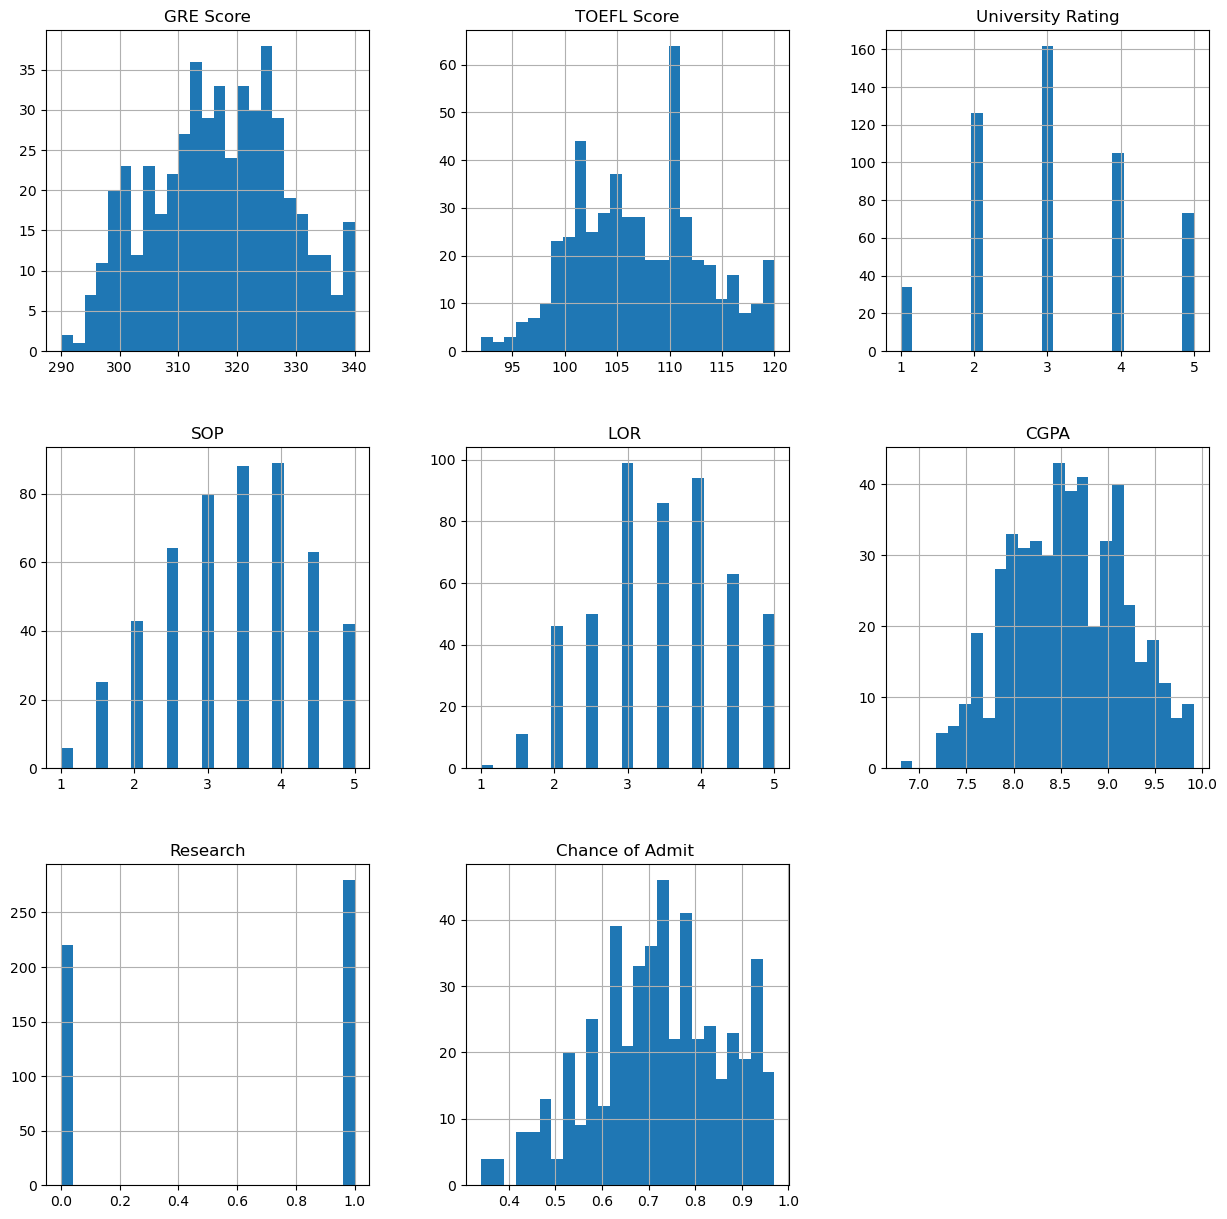

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(X)

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
yTrain = np.array(yTrain)

X_test = np.array(X_test)
yTest = np.array(yTest)

yTrain = yTrain.reshape(-1, 1)
yTest = yTest.reshape(-1,1)



In [ ]:
# Definición de dimensiones de salida, varaibles de interés
output_var = yTrain.shape[1]
print(output_var, ' output variables')

1  output variables


In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


In [ ]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

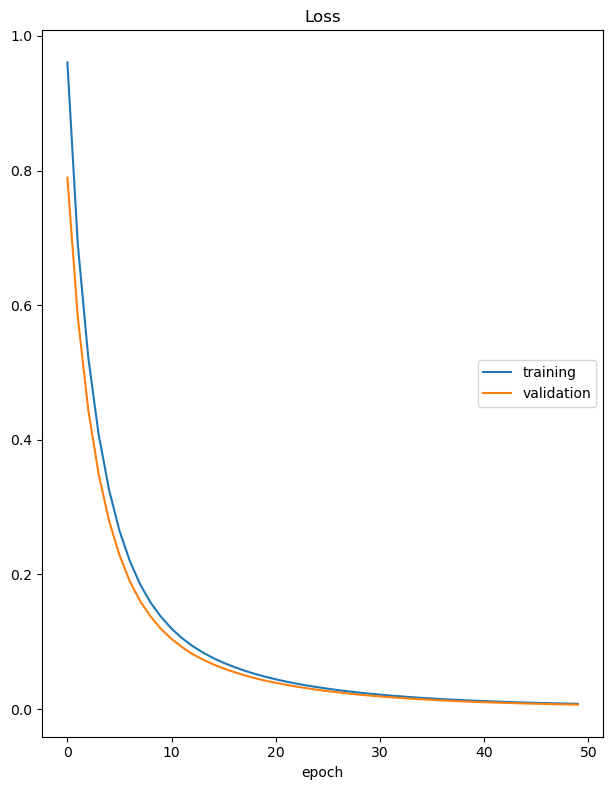

Loss
	training         	 (min:    0.008, max:    0.961, cur:    0.008)
	validation       	 (min:    0.007, max:    0.790, cur:    0.007)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0075 - val_loss: 0.0066


In [ ]:
# Entrenamiento de la red neuronal con 30 épocas
model.fit(X_train, yTrain,
          verbose=1,
          epochs=50,
          validation_data=(X_test, yTest),
          callbacks=[PlotLossesKeras()])

In [ ]:
# Evaluación del modelo 1
Neurona_1 = model.predict(X_test)
mse_neurona_1 = mean_squared_error(yTest, Neurona_1)
print("MSE= ",mse_neurona_1)
mae_neurona_1 = mean_absolute_error(yTest, Neurona_1)
print("MAE=", mae_neurona_1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MSE=  0.0066323437452186175
MAE= 0.060545854973793035


Basándonos en el gráfico de pérdidas, tanto la perdida de entrenamiento como la de validacion disminuyen rapidamente en las primeras épocas, esto  indicaria que el modelo está aprendiendo eficazmente de los datos inicialmente.

Alrededor de 20-30 épocas, en ambas curvas parecen estabilizarse y muestran una mejora miinima. Este punto de estabilizacion es donde las ganancias son marginales en la reducción de pérdida, y se vuelven mas pequeñas con cada época adicional.

En el modelo tomamos 30, se observa que se vuelve asintotico la funcion de perdida

## Red neuronal de una sola capa con early stopping

In [ ]:
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import ModelCheckpoint

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model1 = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model1.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer='sgd', loss='mean_squared_error')

# Impresión de la arquitectura de la red neuronal
print(model1.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True, save_weights_only=False)



In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model1.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Entrenamiento de la red neuronal con 700 épocas y early stopping
model1.fit(X_train, yTrain,
          verbose=True,
          epochs=700,
          batch_size=20,
          validation_data=(X_test,yTest),
          callbacks=[best_model, early_stop])

Epoch 1/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9253 - val_loss: 0.5239
Epoch 2/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5222 - val_loss: 0.3255
Epoch 3/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3022 - val_loss: 0.2112
Epoch 4/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2159 - val_loss: 0.1434
Epoch 5/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1463 - val_loss: 0.1036
Epoch 6/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.1070 - val_loss: 0.0790
Epoch 7/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0761 - val_loss: 0.0634
Epoch 8/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - loss: 0.0621 - val_loss: 0.0522
Epoch 9/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0631 - val_loss: 0.0441
Epoch 10/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0438 - val_loss: 0.0377
Epoch 11/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0368 - val_loss: 0.0326
Epoch 12/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 0.0036 - val_loss: 0.0032
Epoch 69/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0040 - val_loss: 0.0032
Epoch 70/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 71/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 72/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 0.0036 - val_loss: 0.0032
Epoch 73/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037 - val_loss: 0.0032
Epoch 74/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.0041 - val_loss: 0.0032
Epoch 75/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - loss: 0.0041 - val_loss: 0.0032
Epoch 76/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 77/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 78/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - loss: 0.0040 - val_loss: 0.0032
Epoch 79/700
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step

In [ ]:
# Evaluación del modelo 1
Neurona_1_early = model1.predict(X_test)
mse_neurona_1_early = mean_squared_error(yTest, Neurona_1_early)
print("MSE= ",mse_neurona_1_early)
mae_neurona_1_early = mean_absolute_error(yTest, Neurona_1_early)
print("MAE=", mae_neurona_1_early)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MSE=  0.0031325865158376835
MAE= 0.040919721865654


A medida que avanzan las épocas, paso a paso, la disminucion en la pérdida se vuelve menos pronunciada. Esto se debe a que el modelo se va ajustando y mejorando hasta llegar a un punto de estabilidad donde los pasos de ajustes adicionales ya tienen impacto menor.

Se toma la configuracion de patience 10, epochs 700 y batch_size 20; se indentica que esta configuración minimiza el valor de MSE, MAE y haciendo uso de early stopping se logra identificar que en el epoch 108 no se logra una disminución de la función de pérdida

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from livelossplot import PlotLossesKeras

# Creación del modelo
model2 = Sequential()
model2.add(Dense(128, input_dim=dims, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(output_var, activation='sigmoid'))

# Impresión de la arquitectura de la red neuronal
print(model2.summary())



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,345 (36.50 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

None


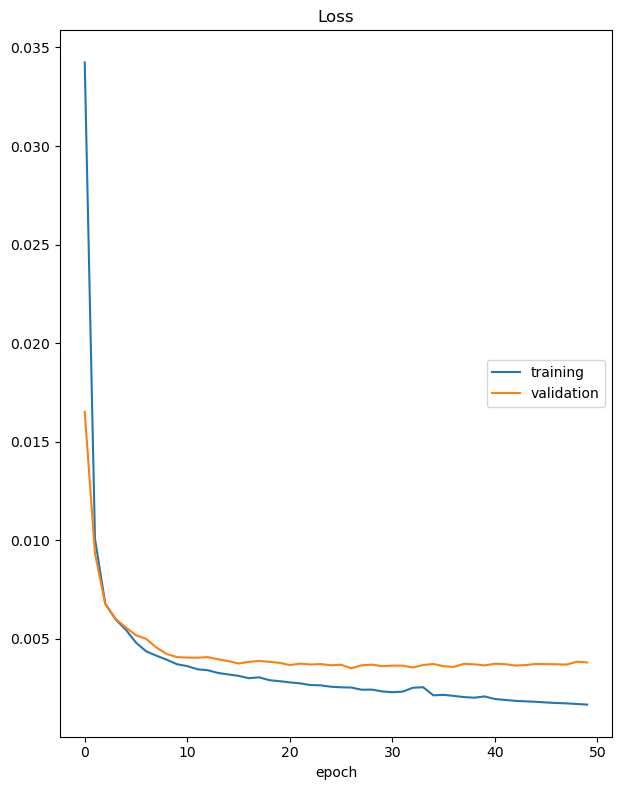

Loss
	training         	 (min:    0.002, max:    0.034, cur:    0.002)
	validation       	 (min:    0.004, max:    0.017, cur:    0.004)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017 - val_loss: 0.0038
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE =  0.0038078910730811955
MAE =  0.04591908513704936


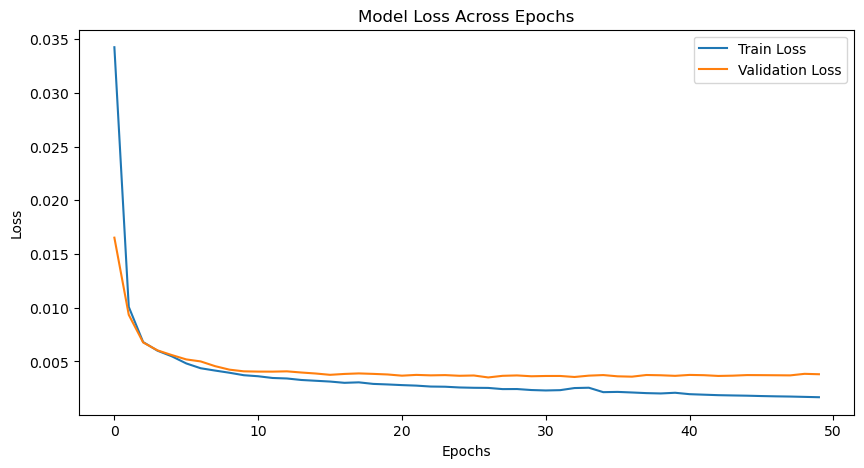

In [ ]:
# Compilación del modelo
model2.compile(optimizer=Adam(), loss='mean_squared_error')

# Entrenamiento del modelo con visualización de la pérdida
registros = model2.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=50, verbose=1, callbacks=[PlotLossesKeras()])

# Evaluación del modelo
predictions = model2.predict(X_test)
mse2 = mean_squared_error(yTest, predictions)
mae2 = mean_absolute_error(yTest, predictions)
print("MSE = ", mse2)
print("MAE = ", mae2)

# Gráficas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(registros.history['loss'], label='Train Loss')
plt.plot(registros.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Across Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

Justificación:

Adam se elige como optimizador que ajusta la tasa de aprendizaje de manera adaptativa para diferentes parámetros. Esto es más eficaz de acuerdo con la literatura en la convergencia hacia mínimos óptimos en comparación con otros optimizadores estáticos como SGD.

Selecionamos un número adecuado de épocas en 50 en este caso, que es un equilibrio entre permitir que el modelo aprenda suficientemente bien de los datos y evitar el sobreajuste.

Se elige primera capa con 128 neuronas, Se elige este número relativamente alto de neuronas para permitir que la red explore un espacio de características amplio. Esto es útil para las etapas iniciales del aprendizaje

Una cantidad menor de neuronas (64) en la segunda capa ayuda a consolidar la información aprendida, facilitando la transición a una predicción de salida definida.

Se elige ReLU (Rectified Linear Unit) como funcion de activación para aprovechar su eficiencia computacional y que su capacidad permite mitigar el problema del desvanecimiento del gradiente. Ademas que permite que la red aprenda relaciones no lineales complejas.

Se elige Sigmoid para la capa de salida dado que el objetivo es predecir una probabilidad (un valor entre 0 y 1) de admision de estudiantes.


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0721 - val_loss: 0.2515
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2525 - val_loss: 0.1342
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1323 - val_loss: 0.0544
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1029 - val_loss: 0.0371
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0739 - val_loss: 0.0266
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0643 - val_loss: 0.0219
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0631 - val_loss: 0.0176
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0552 - val_loss: 0.0143
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0440 - val_loss: 0.0134
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0550 - val_loss: 0.0125
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428 - val_loss: 0.0120
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0435 - val_loss: 0.0120


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 - val_loss: 0.0069
Epoch 71/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 - val_loss: 0.0067
Epoch 72/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 - val_loss: 0.0060
Epoch 73/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0128 - val_loss: 0.0079
Epoch 74/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121 - val_loss: 0.0066
Epoch 75/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0119 - val_loss: 0.0062
Epoch 76/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 - val_loss: 0.0080
Epoch 77/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112 - val_loss: 0.0063
Epoch 78/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122 - val_loss: 0.0062
Epoch 78: early stopping
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MSE= 0.006157918448005913
MAE= 0.06164237379233042


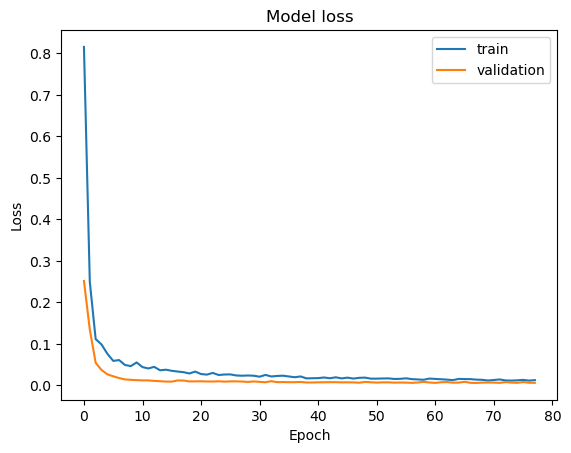

In [ ]:
# Celda 3-1A OPTIMIZADOR ADAM

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Limpiar sesión anterior
K.clear_session()

# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.2),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.2),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])

# Compilación del modelo
model3.compile(optimizer='adam', loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2958 - val_loss: 0.1742
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1208 - val_loss: 0.0628
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0616 - val_loss: 0.0107
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0352 - val_loss: 0.0085
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0207 - val_loss: 0.0109
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - val_loss: 0.0067
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0185 - val_loss: 0.0069
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - val_loss: 0.0073
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 - val_loss: 0.0058
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0116 - val_loss: 0.0061
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 - val_loss: 0.0054
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0097 - val_loss: 0.0050
E

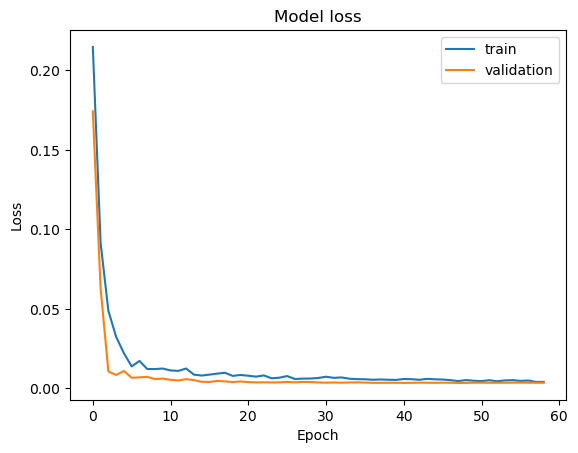

In [ ]:
# Celda 3-1B OPTIMIZADOR SGD

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


#### Resultados Obtenidos Cambio Optimizador

#### Con Optimizador Adam:
- MSE (Mean Squared Error): 0.0061
- MAE (Mean Absolute Error): 0.0616

#### Con Optimizador SGD:
- MSE (Mean Squared Error): 0.0035
- MAE (Mean Absolute Error): 0.045

**Elección: El optimizador SGD con tasa de aprendizaje ajustada y momentum, ha demostrado ser más efectivo para este modelo y dataset específico en comparación con el optimizador Adam, Tal como lo evidencian los errores MSE y MAE son más bajos con SGD, lo que indica un mejor ajuste del modelo a los datos.**

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3085 - val_loss: 0.1186
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0991 - val_loss: 0.0524
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0723 - val_loss: 0.0162
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348 - val_loss: 0.0149
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0224 - val_loss: 0.0143
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0217 - val_loss: 0.0093
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0201 - val_loss: 0.0088
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0158 - val_loss: 0.0082
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0137 - val_loss: 0.0078
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - val_loss: 0.0075
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129 - val_loss: 0.0076
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 - val_loss: 0.0072
E

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 71/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 72/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 73/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 74/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - val_loss: 0.0050
Epoch 75/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 76/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0049
Epoch 77/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 78/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 79/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch 80/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0049
Epoch 81/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0049
Epoch

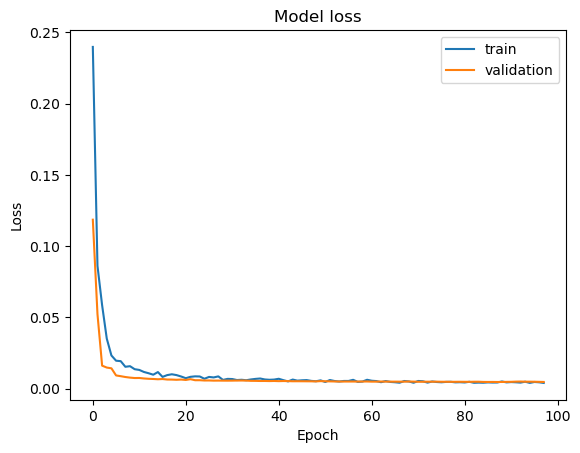

In [ ]:
# Celda 3-2A CAMBIO EN EL NUMERO DE NEURONAS

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(64, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(32, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7379 - val_loss: 0.3290
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2344 - val_loss: 0.0357
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0603 - val_loss: 0.0337
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 - val_loss: 0.0126
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 - val_loss: 0.0095
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082 - val_loss: 0.0057
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 - val_loss: 0.0055
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 - val_loss: 0.0046
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0043
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063 - val_loss: 0.0043


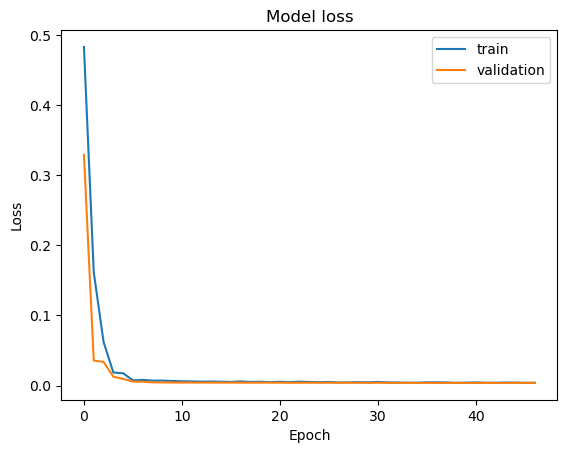

In [ ]:
# Celda 3-2B CAMBIO EN EL NUMERO DE NEURONAS

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3256 - val_loss: 0.2578
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2041 - val_loss: 0.0515
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0696 - val_loss: 0.0169
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 - val_loss: 0.0087
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0056
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - val_loss: 0.0057
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0090 - val_loss: 0.0053
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0050
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0084 - val_loss: 0.0047
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0048
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0061 - val_loss: 0.0046
E

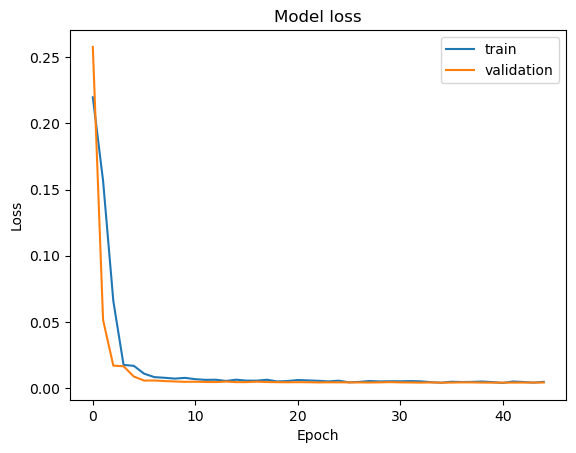

In [ ]:
# Celda 3-2C CAMBIO EN EL NUMERO DE NEURONAS

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(256, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(128, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


#### Configuraciones Probadas - Cambio Numero de Neuronas:

**Celda 3-2A (64 -> 32 Neuronas):**
    
- MSE: 0.0047
- MAE: 0.0505
- Epochs hasta Early Stopping: 98
    
**Celda 3-2B (128 -> 64 Neuronas):**

- MSE: 0.0038
- MAE: 0.0454
- Epochs hasta Early Stopping: 47

**Celda 3-2C (256 -> 128 Neuronas):**

- MSE: 0.0041
- MAE: 0.0491
- Epochs hasta Early Stopping: 45

La configuración con 128 a 64 neuronas (Celda 3-2B) resultó tener el MSE más bajo, indicando una mejor precisión en términos de error cuadrático medio. NO obstante lo anterior, esa configuración también mostró un MAE ligeramente mayor en comparación con la Celda 3-2C.

En cuento a convergencia de entrenameinto se puede destacar que los modelos con mayor número de neuronas alcanzaron el early stopping más rápido (45 epochs), eso puede sugerir alguna capacidad de aprendizaje más eficiente o una rápida adaptación a los datos.

**Elección: La configuración con 128 a 64 neuronas parece ser el mejor compromiso entre complejidad y rendimiento**

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8399 - val_loss: 0.3198
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2872 - val_loss: 0.0255
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0458 - val_loss: 0.0524
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0384 - val_loss: 0.0069
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 - val_loss: 0.0115
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 - val_loss: 0.0057
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0086 - val_loss: 0.0050
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - val_loss: 0.0047
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - val_loss: 0.0044
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0046
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070 - val_loss: 0.0044
E

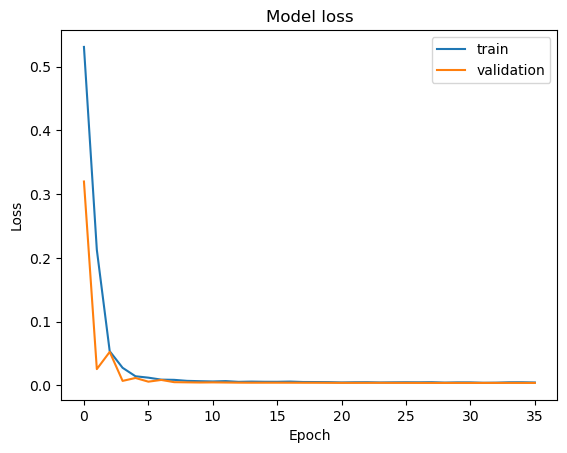

In [ ]:
# Celda 3-3A CAMBIO EN LA PACIENCIA

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4112 - val_loss: 0.1900
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1446 - val_loss: 0.0322
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0401 - val_loss: 0.0145
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 - val_loss: 0.0144
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 - val_loss: 0.0080
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 - val_loss: 0.0076
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 - val_loss: 0.0062
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0058
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0098 - val_loss: 0.0057
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - val_loss: 0.0056
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 - val_loss: 0.0052
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0072 - val_loss: 0.0050
E

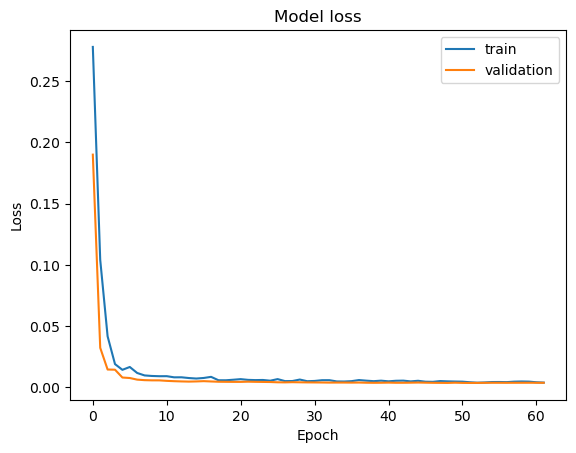

In [ ]:
# Celda 3-3B CAMBIO EN LA PACIENCIA

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6616 - val_loss: 0.2734
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2018 - val_loss: 0.0776
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0732 - val_loss: 0.0292
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0306 - val_loss: 0.0310
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0281 - val_loss: 0.0076
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0115 - val_loss: 0.0101
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.0050
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0095 - val_loss: 0.0045
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083 - val_loss: 0.0051
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0046
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0068 - val_loss: 0.0044
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_loss: 0.0043
E

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 71/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 72/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 73/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 74/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0037
Epoch 75/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0037
Epoch 76/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 77/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 78/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 79/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 80/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 81/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0038
Epoch

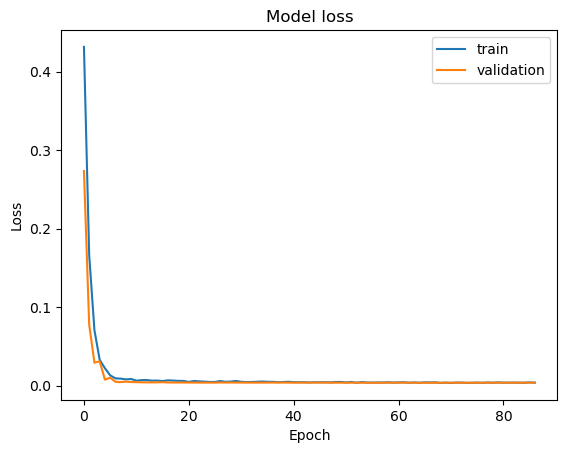

In [ ]:
# Celda 3-3C CAMBIO EN LA PACIENCIA

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Configuraciones Probadas - Cambio en la Paciencia:


    Celda 3-3A (Paciencia = 5)

- MSE: 0.00378
- MAE: 0.04662
- Epoch de Detención: 36

    Celda 3-3B (Paciencia = 10)

- MSE: 0.00366
- MAE: 0.04445
- Epoch de Detención: 62

    Celda 3-3C (Paciencia = 20)

- MSE: 0.00377
- MAE: 0.04492
- Epoch de Detención: 87


**Al evaluar cuál de los modelos anteriores es mejor, debemos considerar tanto los valores de las métricas (MSE y MAE) como la eficiencia en el entrenamiento (número de epochs hasta el early stopping). Considerando como prinicpal objetivo el equilibrio entre mantener una baja en los errores de predicción y no alargar demasiado el tiempo de entrenamiento, la mejor elección es: Celda 3-3B (Paciencia =10)**


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5857 - val_loss: 0.2001
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2243 - val_loss: 0.0289
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0392 - val_loss: 0.0594
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0442 - val_loss: 0.0093
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 - val_loss: 0.0109
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150 - val_loss: 0.0070
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - val_loss: 0.0085
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 - val_loss: 0.0059
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 - val_loss: 0.0059
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0064 - val_loss: 0.0054
E

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 71/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 72/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 73/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 74/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 75/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0040
Epoch 76/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 77/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 - val_loss: 0.0041
Epoch 78/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 79/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 80/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 81/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0040
Epoch

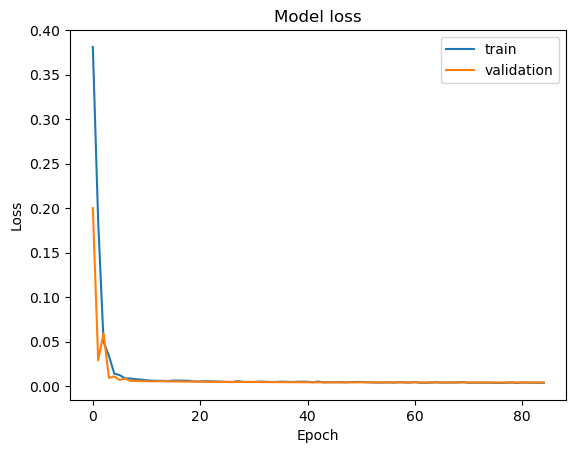

In [ ]:
# Celda 3-4A CAMBIO EN VALOR DROPOUT

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5208 - val_loss: 0.2947
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2214 - val_loss: 0.0323
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0565 - val_loss: 0.0451
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0327 - val_loss: 0.0136
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 - val_loss: 0.0073
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0117 - val_loss: 0.0094
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0139 - val_loss: 0.0056
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0060
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0104 - val_loss: 0.0058
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0079 - val_loss: 0.0059
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0084 - val_loss: 0.0054
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0082 - val_loss: 0.0053
E

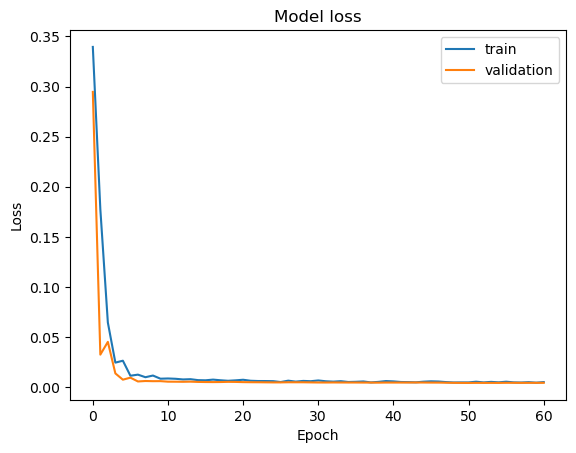

In [ ]:
# Celda 3-4B CAMBIO EN VALOR DROPOUT

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.15),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.15),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6160 - val_loss: 0.3361
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2236 - val_loss: 0.0734
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0808 - val_loss: 0.0194
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 - val_loss: 0.0134
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0249 - val_loss: 0.0061
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0110 - val_loss: 0.0094
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 - val_loss: 0.0046
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 0.0044
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0111 - val_loss: 0.0042
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0074 - val_loss: 0.0043
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0071 - val_loss: 0.0042
E

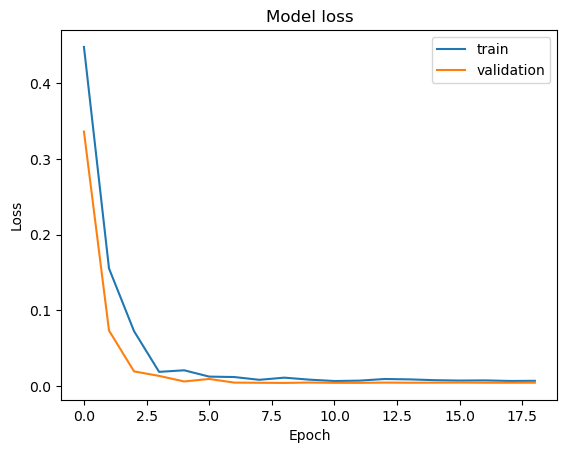

In [ ]:
# Celda 3-4C CAMBIO EN VALOR DROPOUT

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.2),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.2),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7427 - val_loss: 0.3200
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2464 - val_loss: 0.0801
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0828 - val_loss: 0.0341
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296 - val_loss: 0.0143
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0266 - val_loss: 0.0055
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - val_loss: 0.0100
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0148 - val_loss: 0.0061
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 - val_loss: 0.0047
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0100 - val_loss: 0.0047
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0073 - val_loss: 0.0052
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 - val_loss: 0.0052
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0089 - val_loss: 0.0051
E

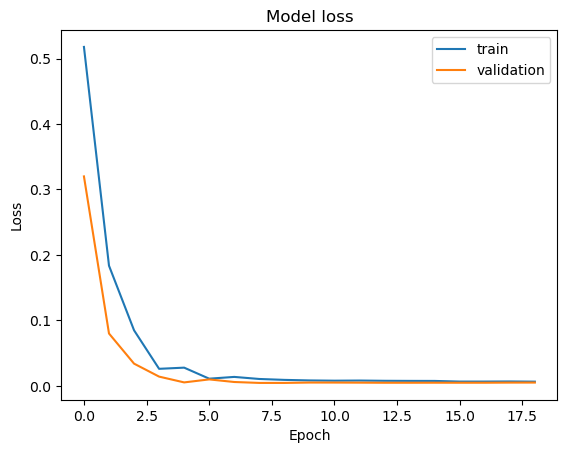

In [ ]:
# Celda 3-4D CAMBIO EN VALOR DROPOUT

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.25),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.25),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse = mean_squared_error(yTest, predictions)
mae = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### Configuraciones Probadas - Cambio en DROPOUT:

Celda 3-4A: Dropout de 0.1
- MSE: 0.004098
- MAE: 0.046420
- Epoch de Detención: 85

Celda 3-4B: Dropout de 0.15

- MSE: 0.004210
- MAE: 0.047921
- Epoch de Detención: 61
    
Celda 3-4C: Dropout de 0.2

- MSE: 0.004477
- MAE: 0.045017
- Epoch de Detención: 19
    
Celda 3-4D: Dropout de 0.25

- MSE: 0.005200
- MAE: 0.055073
- Epoch de Detención: 19



A mayor valor de dropout resulta peor MSE y MAE, y además requieren muchos epochs para detencion. La Celda 3-4A con un dropout de 0.1 muestra el mejor MSE, sugiriendo que esta tasa de dropout está ayudando a generalizar mejor sin perder capacidad de aprendizaje.

**Elección: En cuanto al equilibrio el dropout de 0.1 (Celda 3-4A) parece ofrecer un buen balance con un MSE bajo y un MAE comparable a los demás, aunque requiere ligeramente más epochs para detenerse.**

## Punto 3 Elección del MODELO MULTICAPA A PARTIR DE PASOS ANTERIORES

**De acuerdo con todo el desarrollo anterior en las celdas 3-1@, 3-2@, 3-3@, 3-4@, el modelo final elegido se resume a continuación:**
- SGD Optimizador con Tasa Aprendizaje 0.01 y Momentum 0.9
- 128 Cantidad de Neuronas en Capa de entrada y primera capa oculta
- 64 Cantidad de Neuronas en Segunda capa oculta
- 10 Paciencia
- 0.1 Tasa de Droput
- ReLU Función de Activaci4n


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3696 - val_loss: 0.1887
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1500 - val_loss: 0.0666
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0686 - val_loss: 0.0158
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - val_loss: 0.0185
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 - val_loss: 0.0104
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 - val_loss: 0.0093
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - val_loss: 0.0074
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098 - val_loss: 0.0070
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 - val_loss: 0.0068
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - val_loss: 0.0067
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0089 - val_loss: 0.0064
E

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 71/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0045
Epoch 72/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 73/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 74/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 75/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0039 - val_loss: 0.0044
Epoch 76/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 77/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 78/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 79/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 0.0044
Epoch 80/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 81/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - val_loss: 0.0043
Epoch

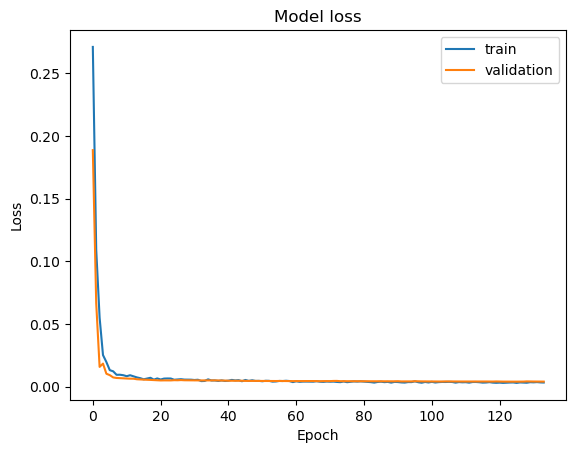

In [ ]:
# MODELO MULTICAPA ELEGIDO A PARTIR DE PASOS ANTERIORES

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.optimizers import SGD


# Limpiar sesión anterior
K.clear_session()


# Inicialización del modelo
model3 = Sequential([
    Dense(128, input_dim=dims, activation='relu'),  # Capa de entrada y primera capa oculta
    Dropout(0.1),                                   # Dropout para reducir el sobreajuste
    Dense(64, activation='relu'),                   # Segunda capa oculta
    Dropout(0.1),                                   # Segundo dropout
    Dense(1, activation='linear')                   # Capa de salida
])


# Configuración del optimizador SGD
optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)

# Compilación del modelo con SGD
model3.compile(optimizer=optimizer_sgd, loss='mean_squared_error')

# Configuración de callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
best_model = ModelCheckpoint('best_model.keras', save_best_only=True, verbose=0)

# Entrenamiento del modelo
model3_trained = model3.fit(X_train, yTrain, validation_data=(X_test, yTest), epochs=200, batch_size=32, verbose=1, callbacks=[best_model, early_stop])

# Evaluación del modelo
predictions = model3.predict(X_test)
mse3 = mean_squared_error(yTest, predictions)
mae3 = mean_absolute_error(yTest, predictions)

print("MSE=", mse)
print("MAE=", mae)

# Visualización de la pérdida durante el entrenamiento
plt.plot(model3_trained.history['loss'], label='train')
plt.plot(model3_trained.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# Impresión de la arquitectura de la red neuronal
print(model3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,692 (73.02 KB)

 Trainable params: 9,345 (36.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,347 (36.52 KB)

None


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

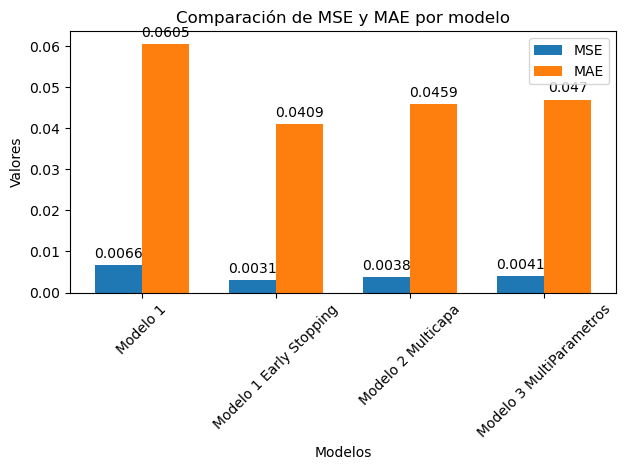

In [ ]:
# Celda 4

import matplotlib.pyplot as plt
import numpy as np

# Datos de MSE y MAE
mse_values = [mse_neurona_1, mse_neurona_1_early, mse2, mse3]
mae_values = [mae_neurona_1, mae_neurona_1_early, mae2, mae3]

# Etiquetas para cada modelo
labels = ['Modelo 1', 'Modelo 1 Early Stopping', 'Modelo 2 Multicapa', 'Modelo 3 MultiParametros']

# Configuración de los gráficos
x = np.arange(len(labels))  # Localizaciones de las etiquetas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_values, width, label='MSE')
rects2 = ax.bar(x + width/2, mae_values, width, label='MAE')

# Agregar etiquetas, título y leyenda personalizada
ax.set_xlabel('Modelos')
ax.set_ylabel('Valores')
ax.set_title('Comparación de MSE y MAE por modelo')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

# Función para añadir etiquetas de datos en las barras
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 4)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Llamar a la función para ambas series de barras
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


El  modelo_1 presenta los valores más altos de MSE y MAE en comparación con los otros modelos, lo que indica un menor rendimiento en general. La simplicidad de una única capa es relativamente insuficiente para capturar la complejidad de los datos.

En cuanto al uso del modelo 1 variante early stopping ha mejorado significativamente el rendimiento del modelo en comparación con el Modelo 1, reduciendo tanto el MSE como el MAE. Esto sugiere que detener el entrenamiento en el momento adecuado puede prevenir el sobreajuste y mejorar la generalización del modelo.

Los modelos más complejos (Modelo 2 y Modelo 3) aunque resultaron en mejoras significativas del rendimiento con respecto al modelo 1, tambien sugieren que la selección y la configuración adecuada de características del modelo son cruciales y que más parámetros o capas no necesariamente garantizan automáticamente un mejor rendimiento.